In [51]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [60]:
path = '../CODSOFT/spam.csv'

# Try reading with 'utf-8' encoding first
try:
    df = pd.read_csv(path)
except UnicodeDecodeError:
    # If utf-8 fails, try 'latin1' or 'ISO-8859-1'
    df = pd.read_csv(path, encoding='latin1')[['v1', 'v2']]

### Labeling the columns

In [21]:
df.columns = ['Tag', 'Message']
df.head()

,Tag,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### Non_null values are same in both columns 
no column has null values, 
also datatype is correct


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tag      5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


### Grouping them by label

In [23]:
df.groupby('Tag').describe()

Message                                                               
       count unique                                                top freq
Tag                                                                        
ham     4825   4516                             Sorry, I'll call later   30
spam     747    653  Please call our customer service representativ...    4

<Axes: xlabel='Tag', ylabel='count'>

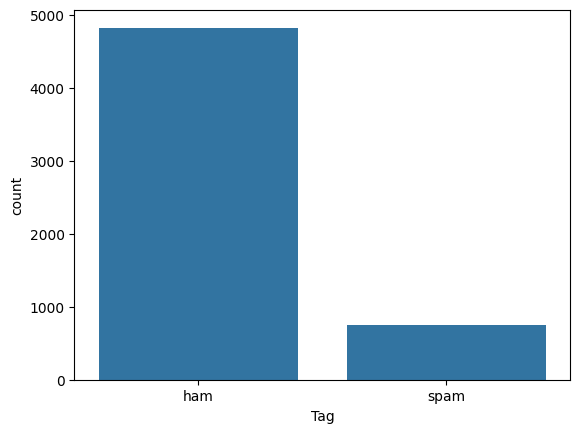

In [27]:
sns.countplot(data=df, x='Tag')

In [29]:
# Map 'ham' to 0 and 'spam' to 1
df['Tag'] = df['Tag'].map({'ham': 0, 'spam': 1})

In [30]:
# Separate features (X) and target (y)
X = df['Message']
y = df['Tag']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

In [35]:
# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)

In [36]:
# Transform the test data
X_test = vectorizer.transform(X_test)

In [38]:
# Initialize Naive Bayes Classifier
model = MultinomialNB()

In [39]:
# Train the classifier
model.fit(X_train, y_train)

MultinomialNB()

In [40]:
# Predict on the test data
y_pred = model.predict(X_test)

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9623318385650225


In [42]:
# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.72      0.84       150

    accuracy                           0.96      1115
   macro avg       0.98      0.86      0.91      1115
weighted avg       0.96      0.96      0.96      1115



In [52]:
# Initialize Logistic Regression model
model2 = LogisticRegression()

# Fit the Logistic Regression model
model2.fit(X_train, y_train)

# Predictions using Logistic Regression
logreg_y_pred = model2.predict(X_test)

# Evaluating Logistic Regression
logreg_accuracy = accuracy_score(y_test, logreg_y_pred)
print("Logistic Regression Accuracy:", logreg_accuracy)

logreg_conf_matrix = confusion_matrix(y_test, logreg_y_pred)
print("Logistic Regression Confusion Matrix:\n", logreg_conf_matrix)

logreg_report = classification_report(y_test, logreg_y_pred)
print("Logistic Regression Classification Report:\n", logreg_report)

Logistic Regression Accuracy: 0.967713004484305
Logistic Regression Confusion Matrix:
 [[964   1]
 [ 35 115]]
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       0.99      0.77      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.97      1115



### Driving Code

In [56]:
# Take input message from user
input_message = input("Enter the message to classify: ")

# Convert the input message to TF-IDF features
input_message_tfidf = vectorizer.transform([input_message])

# Predict the label for the input message
predicted_label = model.predict(input_message_tfidf)[0]

# Map predicted label back to original tag names
predicted_label = 'ham' if predicted_label == 0 else 'spam'

# Print the predicted label
print("Predicted Label:", predicted_label)

Predicted Label: ham
